# IMPORT LIBRARIES

In [137]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt # Intermediate Visualization
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns # Advanced Vizualization

# DATA PREPARATION

## Order of Hyper-Active Buyer

In [138]:
dfob_hyper = pd.read_pickle('../2. clustering/pickles/dfob_cl_2_hyper.pkl')
dfob_hyper.head()

,buyer_id,last_transaction,recency_day,order_freq,gmv,aov,revenue,voucher_used,voucher_val,seller_count,num_of_seller_province,num_of_seller_city,cluster,cluster_name
0,631a4da47255a77e0e6d7410,2023-12-21,11,60,210014493,3.500242e+06,1575095,0,0.0,12,7,9,2,Hyper-Active Buyer
1,631a4f977255a77e0e6dec73,2023-12-29,3,110,2226297770,2.023907e+07,16697212,0,0.0,18,5,12,2,Hyper-Active Buyer
2,631a51497255a77e0e6eb585,2023-12-29,3,35,5215607524,1.490174e+08,19029058,0,0.0,15,6,12,2,Hyper-Active Buyer
3,631a514d7255a77e0e6eb6e5,2023-11-17,45,2,2370537,1.185268e+06,17779,0,0.0,1,1,1,2,Hyper-Active Buyer
5,631a514f7255a77e0e6eb7c9,2023-12-31,1,769,44777116849,5.822772e+07,334952661,0,0.0,19,3,9,2,Hyper-Active Buyer


In [139]:
dfob_hyper.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7643 entries, 0 to 12808
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   buyer_id                7643 non-null   object        
 1   last_transaction        7643 non-null   datetime64[ns]
 2   recency_day             7643 non-null   int64         
 3   order_freq              7643 non-null   int64         
 4   gmv                     7643 non-null   int64         
 5   aov                     7643 non-null   float64       
 6   revenue                 7643 non-null   int64         
 7   voucher_used            7643 non-null   int64         
 8   voucher_val             7643 non-null   float64       
 9   seller_count            7643 non-null   int64         
 10  num_of_seller_province  7643 non-null   int64         
 11  num_of_seller_city      7643 non-null   int64         
 12  cluster                 7643 non-null   int32       

In [140]:
buyer_id_hyper = set(dfob_hyper['buyer_id'])
len(buyer_id_hyper)

7643

## All Order (2023)

In [141]:
dfo = pd.read_csv('../__dataset/order.csv')

C:\Users\stamp\AppData\Local\Temp\ipykernel_10912\3024604005.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  dfo = pd.read_csv('../__dataset/order.csv')


In [142]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159133 entries, 0 to 159132
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   po_number            159133 non-null  object 
 1   transaction_date     159133 non-null  object 
 2   order_address_id     159133 non-null  int64  
 3   order_status         159133 non-null  object 
 4   payment_group        159133 non-null  object 
 5   payment_method       159133 non-null  object 
 6   shipping_agency      159133 non-null  object 
 7   shipping_cost        159133 non-null  int64  
 8   total_project_value  159133 non-null  int64  
 9   voucher_val          68399 non-null   float64
 10  voucher_code         5160 non-null    object 
 11  revenue              159133 non-null  int64  
 12  seller_id            159127 non-null  object 
 13  seller_category      159127 non-null  object 
 14  buyer_id             159133 non-null  object 
dtypes: float64(1), in

In [143]:
dfo

,po_number,transaction_date,order_address_id,order_status,payment_group,payment_method,shipping_agency,shipping_cost,total_project_value,voucher_val,voucher_code,revenue,seller_id,seller_category,buyer_id
0,PO-2023-12-12-8804434,2023-12-12,463776,Selesai,TOP,mandiriva,Kurir Pribadi,0,53280000,NaN,NaN,399600,NaN,NaN,631a5aafaa3096cbda250540
1,PO-2023-10-11-4866339,2023-10-11,426155,Selesai,TOP,mps-briva,Kurir Pribadi,0,78775501,NaN,NaN,590816,631a50645b9755003d24d6b9,Kecil,631a5c7f8755a8a989600737
2,PO-2023-12-08-7257980,2023-12-08,461137,Dibatalkan,TOP,mps-briva,Kurir Pribadi,0,93125670,NaN,NaN,698442,631a50645b9755003d24d6b9,Kecil,631a5c7f8755a8a989600737
3,PO-2023-04-18-108977,2023-04-18,304802,Selesai,TOP,mps-briva,Kurir Pribadi,0,33300000,NaN,NaN,249750,631a50645b9755003d24d6b9,Kecil,631a5c7f8755a8a989600737
4,PO-2023-12-13-1031978,2023-12-13,465248,Selesai,TOP,mandiri_va_billing_fixed,self,0,331890000,0.0,NaN,1659450,631a50655b9755003d24d78a,Kecil,631a56248755a8a9895e1b31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159128,PO-2023-06-16-128661,2023-06-16,140572,Selesai,Direct,BTNATM,self,0,207500,0.0,NaN,1556,63a94e7cd2c84f87b7e67217,Mikro,631a5b21aa3096cbda2529b2
159129,PO-2023-11-30-4342388,2023-11-30,455045,Selesai,Direct,QREN,biteship_jnt,9000,59000,0.0,NaN,442,63aa70cbcb47446d5bdef77a,Mikro,63341acf3d78e58aa0429c8e
159130,PO-2023-06-07-123774,2023-06-07,108108,Ditolak Penjual,Direct,bni_ecoll_va,biteship_sicepat,42000,142000,0.0,NaN,1065,63aa720fcb47446d5bdf1413,Mikro,63aa9cd8e0c8172b92738dfd
159131,PO-2023-07-21-143881,2023-07-21,293510,Selesai,Direct,QREN,self,0,6500,0.0,NaN,48,63aa832bcb47446d5be0c3dd,Mikro,63ac321ef2bdefdb4a42878e


## Filter by buyer_id (only for Hyper-Active Buyer)

In [144]:
dfo_buyer_hyper = dfo[dfo['buyer_id'].isin(buyer_id_hyper)]

In [145]:
len(dfo_buyer_hyper)

149552

In [146]:
dfo_buyer_hyper.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149552 entries, 0 to 159132
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   po_number            149552 non-null  object 
 1   transaction_date     149552 non-null  object 
 2   order_address_id     149552 non-null  int64  
 3   order_status         149552 non-null  object 
 4   payment_group        149552 non-null  object 
 5   payment_method       149552 non-null  object 
 6   shipping_agency      149552 non-null  object 
 7   shipping_cost        149552 non-null  int64  
 8   total_project_value  149552 non-null  int64  
 9   voucher_val          61304 non-null   float64
 10  voucher_code         2196 non-null    object 
 11  revenue              149552 non-null  int64  
 12  seller_id            149546 non-null  object 
 13  seller_category      149546 non-null  object 
 14  buyer_id             149552 non-null  object 
dtypes: float64(1), int64(4

In [147]:
dfo_buyer_hyper.head()

,po_number,transaction_date,order_address_id,order_status,payment_group,payment_method,shipping_agency,shipping_cost,total_project_value,voucher_val,voucher_code,revenue,seller_id,seller_category,buyer_id
0,PO-2023-12-12-8804434,2023-12-12,463776,Selesai,TOP,mandiriva,Kurir Pribadi,0,53280000,NaN,NaN,399600,NaN,NaN,631a5aafaa3096cbda250540
1,PO-2023-10-11-4866339,2023-10-11,426155,Selesai,TOP,mps-briva,Kurir Pribadi,0,78775501,NaN,NaN,590816,631a50645b9755003d24d6b9,Kecil,631a5c7f8755a8a989600737
2,PO-2023-12-08-7257980,2023-12-08,461137,Dibatalkan,TOP,mps-briva,Kurir Pribadi,0,93125670,NaN,NaN,698442,631a50645b9755003d24d6b9,Kecil,631a5c7f8755a8a989600737
3,PO-2023-04-18-108977,2023-04-18,304802,Selesai,TOP,mps-briva,Kurir Pribadi,0,33300000,NaN,NaN,249750,631a50645b9755003d24d6b9,Kecil,631a5c7f8755a8a989600737
4,PO-2023-12-13-1031978,2023-12-13,465248,Selesai,TOP,mandiri_va_billing_fixed,self,0,331890000,0.0,NaN,1659450,631a50655b9755003d24d78a,Kecil,631a56248755a8a9895e1b31


In [148]:
# Convert 'transaction_date' column to datetime using .loc to avoid the warning
dfo_buyer_hyper.loc[:, 'transaction_date'] = pd.to_datetime(dfo_buyer_hyper['transaction_date'])

In [149]:
dfo_buyer_hyper.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149552 entries, 0 to 159132
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   po_number            149552 non-null  object 
 1   transaction_date     149552 non-null  object 
 2   order_address_id     149552 non-null  int64  
 3   order_status         149552 non-null  object 
 4   payment_group        149552 non-null  object 
 5   payment_method       149552 non-null  object 
 6   shipping_agency      149552 non-null  object 
 7   shipping_cost        149552 non-null  int64  
 8   total_project_value  149552 non-null  int64  
 9   voucher_val          61304 non-null   float64
 10  voucher_code         2196 non-null    object 
 11  revenue              149552 non-null  int64  
 12  seller_id            149546 non-null  object 
 13  seller_category      149546 non-null  object 
 14  buyer_id             149552 non-null  object 
dtypes: float64(1), int64(4

In [150]:
dfo_buyer_hyper.head()

,po_number,transaction_date,order_address_id,order_status,payment_group,payment_method,shipping_agency,shipping_cost,total_project_value,voucher_val,voucher_code,revenue,seller_id,seller_category,buyer_id
0,PO-2023-12-12-8804434,2023-12-12 00:00:00,463776,Selesai,TOP,mandiriva,Kurir Pribadi,0,53280000,NaN,NaN,399600,NaN,NaN,631a5aafaa3096cbda250540
1,PO-2023-10-11-4866339,2023-10-11 00:00:00,426155,Selesai,TOP,mps-briva,Kurir Pribadi,0,78775501,NaN,NaN,590816,631a50645b9755003d24d6b9,Kecil,631a5c7f8755a8a989600737
2,PO-2023-12-08-7257980,2023-12-08 00:00:00,461137,Dibatalkan,TOP,mps-briva,Kurir Pribadi,0,93125670,NaN,NaN,698442,631a50645b9755003d24d6b9,Kecil,631a5c7f8755a8a989600737
3,PO-2023-04-18-108977,2023-04-18 00:00:00,304802,Selesai,TOP,mps-briva,Kurir Pribadi,0,33300000,NaN,NaN,249750,631a50645b9755003d24d6b9,Kecil,631a5c7f8755a8a989600737
4,PO-2023-12-13-1031978,2023-12-13 00:00:00,465248,Selesai,TOP,mandiri_va_billing_fixed,self,0,331890000,0.0,NaN,1659450,631a50655b9755003d24d78a,Kecil,631a56248755a8a9895e1b31


## Cohort data

In [151]:
data = dfo_buyer_hyper.copy()

In [152]:
data['current_month'] = pd.to_datetime(data['transaction_date']).dt.year.map(str) \
                                 + "-" + pd.to_datetime(data['transaction_date']) \
                                 .dt.month.map(str) + "-" '01'

data['current_month'] = pd.to_datetime(data['current_month']).dt.date

In [153]:
data[['order_address_id','buyer_id','transaction_date','current_month']].head(10)

,order_address_id,buyer_id,transaction_date,current_month
0,463776,631a5aafaa3096cbda250540,2023-12-12 00:00:00,2023-12-01
1,426155,631a5c7f8755a8a989600737,2023-10-11 00:00:00,2023-10-01
2,461137,631a5c7f8755a8a989600737,2023-12-08 00:00:00,2023-12-01
3,304802,631a5c7f8755a8a989600737,2023-04-18 00:00:00,2023-04-01
4,465248,631a56248755a8a9895e1b31,2023-12-13 00:00:00,2023-12-01
5,114801,631a56248755a8a9895e1b31,2023-03-16 00:00:00,2023-03-01
6,324803,631a56248755a8a9895e1b31,2023-08-23 00:00:00,2023-08-01
7,270498,631a56248755a8a9895e1b31,2023-09-07 00:00:00,2023-09-01
8,202705,631a56248755a8a9895e1b31,2023-04-27 00:00:00,2023-04-01
9,437058,631a5e8caa3096cbda26b9e2,2023-10-26 00:00:00,2023-10-01


In [154]:
data["cohort_month"] = data.groupby("buyer_id")["current_month"].transform("min")

In [155]:
data[['order_address_id','buyer_id','transaction_date','current_month','cohort_month']].head(10)

,order_address_id,buyer_id,transaction_date,current_month,cohort_month
0,463776,631a5aafaa3096cbda250540,2023-12-12 00:00:00,2023-12-01,2023-01-01
1,426155,631a5c7f8755a8a989600737,2023-10-11 00:00:00,2023-10-01,2023-01-01
2,461137,631a5c7f8755a8a989600737,2023-12-08 00:00:00,2023-12-01,2023-01-01
3,304802,631a5c7f8755a8a989600737,2023-04-18 00:00:00,2023-04-01,2023-01-01
4,465248,631a56248755a8a9895e1b31,2023-12-13 00:00:00,2023-12-01,2023-01-01
5,114801,631a56248755a8a9895e1b31,2023-03-16 00:00:00,2023-03-01,2023-01-01
6,324803,631a56248755a8a9895e1b31,2023-08-23 00:00:00,2023-08-01,2023-01-01
7,270498,631a56248755a8a9895e1b31,2023-09-07 00:00:00,2023-09-01,2023-01-01
8,202705,631a56248755a8a9895e1b31,2023-04-27 00:00:00,2023-04-01,2023-01-01
9,437058,631a5e8caa3096cbda26b9e2,2023-10-26 00:00:00,2023-10-01,2023-01-01


In [156]:
def months_diff(df, col1, col2):
    current_month = pd.to_datetime(data[col1]).dt.month
    cohort_month = pd.to_datetime(data[col2]).dt.month
    return current_month - cohort_month

data['months_diff'] = months_diff(data, 'current_month', 'cohort_month')

In [157]:
data[['order_address_id','buyer_id','transaction_date','current_month','cohort_month', 'months_diff']].head(10)

,order_address_id,buyer_id,transaction_date,current_month,cohort_month,months_diff
0,463776,631a5aafaa3096cbda250540,2023-12-12 00:00:00,2023-12-01,2023-01-01,11
1,426155,631a5c7f8755a8a989600737,2023-10-11 00:00:00,2023-10-01,2023-01-01,9
2,461137,631a5c7f8755a8a989600737,2023-12-08 00:00:00,2023-12-01,2023-01-01,11
3,304802,631a5c7f8755a8a989600737,2023-04-18 00:00:00,2023-04-01,2023-01-01,3
4,465248,631a56248755a8a9895e1b31,2023-12-13 00:00:00,2023-12-01,2023-01-01,11
5,114801,631a56248755a8a9895e1b31,2023-03-16 00:00:00,2023-03-01,2023-01-01,2
6,324803,631a56248755a8a9895e1b31,2023-08-23 00:00:00,2023-08-01,2023-01-01,7
7,270498,631a56248755a8a9895e1b31,2023-09-07 00:00:00,2023-09-01,2023-01-01,8
8,202705,631a56248755a8a9895e1b31,2023-04-27 00:00:00,2023-04-01,2023-01-01,3
9,437058,631a5e8caa3096cbda26b9e2,2023-10-26 00:00:00,2023-10-01,2023-01-01,9


In [158]:
def cohort_index(df, col1):
    return data[col1]

data['cohort_index'] = cohort_index(data, 'months_diff')

In [159]:
data[['order_address_id','buyer_id','transaction_date','current_month','cohort_month', 'months_diff', 'cohort_index']].head(10)

,order_address_id,buyer_id,transaction_date,current_month,cohort_month,months_diff,cohort_index
0,463776,631a5aafaa3096cbda250540,2023-12-12 00:00:00,2023-12-01,2023-01-01,11,11
1,426155,631a5c7f8755a8a989600737,2023-10-11 00:00:00,2023-10-01,2023-01-01,9,9
2,461137,631a5c7f8755a8a989600737,2023-12-08 00:00:00,2023-12-01,2023-01-01,11,11
3,304802,631a5c7f8755a8a989600737,2023-04-18 00:00:00,2023-04-01,2023-01-01,3,3
4,465248,631a56248755a8a9895e1b31,2023-12-13 00:00:00,2023-12-01,2023-01-01,11,11
5,114801,631a56248755a8a9895e1b31,2023-03-16 00:00:00,2023-03-01,2023-01-01,2,2
6,324803,631a56248755a8a9895e1b31,2023-08-23 00:00:00,2023-08-01,2023-01-01,7,7
7,270498,631a56248755a8a9895e1b31,2023-09-07 00:00:00,2023-09-01,2023-01-01,8,8
8,202705,631a56248755a8a9895e1b31,2023-04-27 00:00:00,2023-04-01,2023-01-01,3,3
9,437058,631a5e8caa3096cbda26b9e2,2023-10-26 00:00:00,2023-10-01,2023-01-01,9,9


In [160]:
data['cohort_month'] = pd.to_datetime(data['cohort_month']).dt.strftime('%Y-%m')
data['current_month'] = pd.to_datetime(data['current_month']).dt.strftime('%Y-%m')

In [161]:
data[['order_address_id','buyer_id','transaction_date','current_month','cohort_month', 'months_diff', 'cohort_index']].head(10)

,order_address_id,buyer_id,transaction_date,current_month,cohort_month,months_diff,cohort_index
0,463776,631a5aafaa3096cbda250540,2023-12-12 00:00:00,2023-12,2023-01,11,11
1,426155,631a5c7f8755a8a989600737,2023-10-11 00:00:00,2023-10,2023-01,9,9
2,461137,631a5c7f8755a8a989600737,2023-12-08 00:00:00,2023-12,2023-01,11,11
3,304802,631a5c7f8755a8a989600737,2023-04-18 00:00:00,2023-04,2023-01,3,3
4,465248,631a56248755a8a9895e1b31,2023-12-13 00:00:00,2023-12,2023-01,11,11
5,114801,631a56248755a8a9895e1b31,2023-03-16 00:00:00,2023-03,2023-01,2,2
6,324803,631a56248755a8a9895e1b31,2023-08-23 00:00:00,2023-08,2023-01,7,7
7,270498,631a56248755a8a9895e1b31,2023-09-07 00:00:00,2023-09,2023-01,8,8
8,202705,631a56248755a8a9895e1b31,2023-04-27 00:00:00,2023-04,2023-01,3,3
9,437058,631a5e8caa3096cbda26b9e2,2023-10-26 00:00:00,2023-10,2023-01,9,9


In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149552 entries, 0 to 159132
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   po_number            149552 non-null  object 
 1   transaction_date     149552 non-null  object 
 2   order_address_id     149552 non-null  int64  
 3   order_status         149552 non-null  object 
 4   payment_group        149552 non-null  object 
 5   payment_method       149552 non-null  object 
 6   shipping_agency      149552 non-null  object 
 7   shipping_cost        149552 non-null  int64  
 8   total_project_value  149552 non-null  int64  
 9   voucher_val          61304 non-null   float64
 10  voucher_code         2196 non-null    object 
 11  revenue              149552 non-null  int64  
 12  seller_id            149546 non-null  object 
 13  seller_category      149546 non-null  object 
 14  buyer_id             149552 non-null  object 
 15  current_month        1

# CALCULATE COHORT SIZE

In [162]:
cohort_counts = data.groupby(['cohort_month', 'cohort_index'])['buyer_id'].nunique()

cohort_counts_data = cohort_counts.to_frame().rename(columns={'buyer_id':'buyers'}) \
                                .sort_values(by=['cohort_month'])

In [163]:
cohort_counts_data

buyers
cohort_month cohort_index        
2023-01      0               2633
             11              2308
             10              2160
             9               2150
             7               1973
...                           ...
2023-10      0                177
             2                 76
2023-11      1                 49
             0                541
2023-12      0                668

[78 rows x 1 columns]

# CALCULATE RETENTION RATE

In [166]:
cohort_counts_data['retention_rate'] = cohort_counts_data['buyers'] / cohort_counts_data.groupby(["cohort_month"])["buyers"].transform("max")

In [167]:
cohort_counts_data

buyers  retention_rate
cohort_month cohort_index                        
2023-01      0               2633        1.000000
             11              2308        0.876567
             10              2160        0.820357
             9               2150        0.816559
             7               1973        0.749335
...                           ...             ...
2023-10      0                177        1.000000
             2                 76        0.429379
2023-11      1                 49        0.090573
             0                541        1.000000
2023-12      0                668        1.000000

[78 rows x 2 columns]

# CALCULATE CLV

In [194]:
cohort_clv = data.groupby(['cohort_month', 'cohort_index'])['total_project_value'].sum()

cohort_clv_data = cohort_clv.to_frame().rename(columns={'total_project_value':'clv'}) \
                                .sort_values(by=['cohort_month'])

cohort_clv_data['clv_millions'] = cohort_clv_data['clv'] / 1_000_000  # Convert to millions
cohort_clv_data['clv_billions'] = cohort_clv_data['clv'] / 1_000_000_000  # Convert to millions

In [195]:
cohort_clv_data

clv   clv_millions  clv_billions
cohort_month cohort_index                                           
2023-01      0             201873542889  201873.542889    201.873543
             11            419626405417  419626.405417    419.626405
             10            306174422220  306174.422220    306.174422
             9             392647958746  392647.958746    392.647959
             7             288284021547  288284.021547    288.284022
...                                 ...            ...           ...
2023-10      0               1011205233    1011.205233      1.011205
             2               1273876929    1273.876929      1.273877
2023-11      1                274977331     274.977331      0.274977
             0               2599601386    2599.601386      2.599601
2023-12      0               2745431882    2745.431882      2.745432

[78 rows x 3 columns]

# PIVOT TABLE COHORT

In [168]:
cohorts_pivot = cohort_counts_data.pivot_table(index='cohort_month', columns = 'cohort_index', values = 'retention_rate')

In [169]:
cohorts_pivot

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2023-01,1.0,0.608431,0.718572,0.681352,0.630080,0.726927,0.747816,0.749335,0.751994,0.816559,0.820357,0.876567
2023-02,1.0,0.548624,0.495413,0.428440,0.522936,0.555046,0.555046,0.589908,0.665138,0.688073,0.801835,NaN
2023-03,1.0,0.345666,0.321353,0.435518,0.457717,0.442918,0.488372,0.551797,0.615222,0.729387,NaN,NaN
2023-04,1.0,0.273267,0.386139,0.372277,0.374257,0.411881,0.493069,0.572277,0.699010,NaN,NaN,NaN
2023-05,1.0,0.297872,0.390071,0.340426,0.326241,0.453901,0.531915,0.709220,NaN,NaN,NaN,NaN
2023-06,1.0,0.309091,0.320000,0.280000,0.396364,0.567273,0.632727,NaN,NaN,NaN,NaN,NaN
2023-07,1.0,0.302521,0.235294,0.399160,0.537815,0.600840,NaN,NaN,NaN,NaN,NaN,NaN
2023-08,1.0,0.226190,0.327381,0.482143,0.636905,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09,1.0,0.250000,0.508333,0.675000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
cohort_counts_size = data.groupby(['cohort_month'])['buyer_id'].nunique()

cohort_counts_size_data = cohort_counts_size.to_frame().rename(columns={'buyer_id':'buyers'}) \
                                .sort_values(by=['cohort_month'])

cohort_counts_size_data

,buyers
cohort_month,
2023-01,2633
2023-02,1090
2023-03,946
2023-04,505
2023-05,282
2023-06,275
2023-07,238
2023-08,168
2023-09,120


In [196]:
cohorts_clv_pivot = cohort_clv_data.pivot_table(index='cohort_month', columns = 'cohort_index', values = 'clv_billions')

In [197]:
cohorts_clv_pivot

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11
cohort_month,,,,,,,,,,,,
2023-01,201.873543,152.145807,252.332125,198.044761,161.171903,239.183081,265.195200,288.284022,268.317519,392.647959,306.174422,419.626405
2023-02,21.714230,17.940582,21.006285,13.360231,21.158222,23.469451,24.396718,23.617393,36.629283,40.098790,38.315115,NaN
2023-03,21.204468,9.447197,9.184270,10.481480,13.794807,13.796454,12.356740,19.262333,15.103959,17.266032,NaN,NaN
2023-04,8.884021,2.009273,3.983172,3.175840,3.889979,3.916470,4.372338,5.672042,6.357795,NaN,NaN,NaN
2023-05,3.587879,1.407682,1.559924,1.190706,1.324673,2.346151,2.574021,3.098666,NaN,NaN,NaN,NaN
2023-06,4.496742,1.188760,1.991438,1.261406,2.528737,2.612560,3.201514,NaN,NaN,NaN,NaN,NaN
2023-07,2.345000,0.937811,0.553967,0.864592,1.534574,1.354363,NaN,NaN,NaN,NaN,NaN,NaN
2023-08,1.641915,0.855987,0.719543,0.674906,1.278953,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-09,0.839231,0.821492,0.242541,0.431008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visualising Cohorts for Analysis

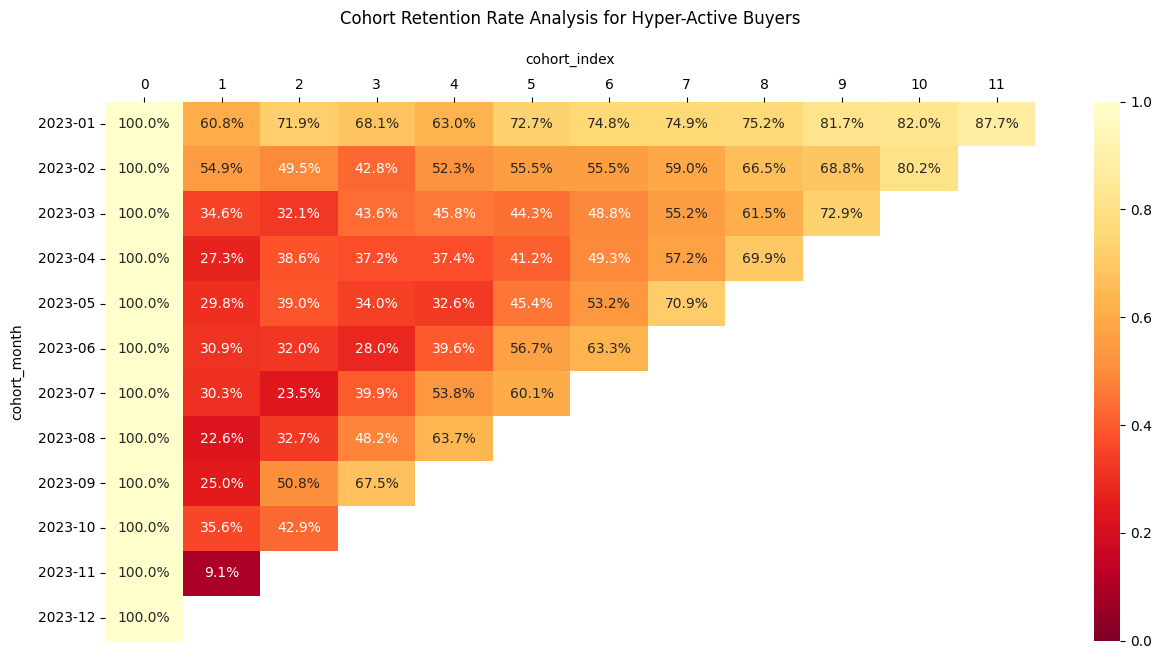

In [208]:
plt.figure(figsize=(15, 7))
heatmap1 = sns.heatmap(data=cohorts_pivot,
                      annot=True,
                      fmt='.1%',
                      vmin=0.0,
                      vmax=1,
                      cmap='YlOrRd_r')

plt.title('Cohort Retention Rate Analysis for Hyper-Active Buyers\n')

# Move x-axis ticks to the top
heatmap1.xaxis.tick_top()

heatmap1.set_xlabel('cohort_index', labelpad=10)
heatmap1.set_ylabel('cohort_month', labelpad=10)
heatmap1.xaxis.set_label_position('top')

plt.show()

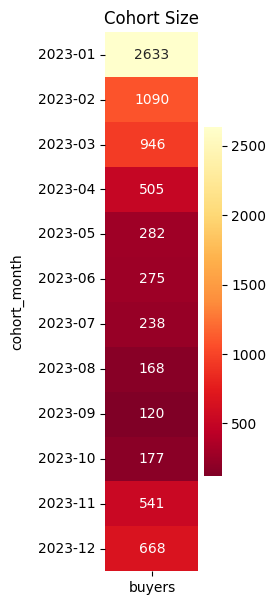

In [201]:
plt.figure(figsize=(1.5, 7))
heatmap2 = sns.heatmap(data=cohort_counts_size_data,
            annot=True, 
            fmt="d",
            cmap="YlOrRd_r")

plt.title('Cohort Size')
plt.ylabel('Cohort Month')

heatmap2.set_ylabel('cohort_month', labelpad=10)

plt.show()

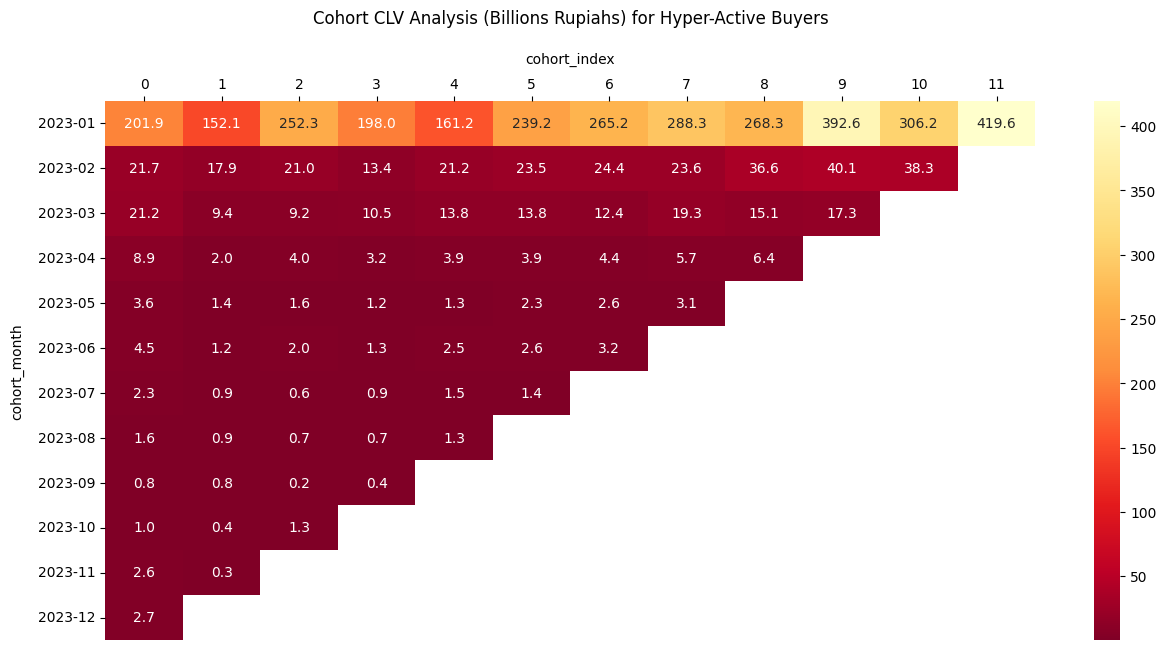

In [209]:
cohorts_clv_pivot = cohort_clv_data.pivot_table(index='cohort_month', columns='cohort_index', values='clv_billions')

plt.figure(figsize=(15, 7))
heatmap3 = sns.heatmap(data=cohorts_clv_pivot,
            annot=True,
            fmt='.1f',  # Format to one decimal place
            cmap='YlOrRd_r')

plt.title('Cohort CLV Analysis (Billions Rupiahs) for Hyper-Active Buyers\n')

# Move x-axis ticks to the top
heatmap3.xaxis.tick_top()

heatmap3.set_xlabel('cohort_index', labelpad=10)
heatmap3.set_ylabel('cohort_month', labelpad=10)
heatmap3.xaxis.set_label_position('top')

plt.show()